In [ ]:
#@title Code that will set everything working for that exercise. It's good to have a look on it, though.
%tensorflow_version 2.x

import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format


"""Create and compile a simple linear regression model."""
def build_model(my_learning_rate):
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model 

       
"""Train the model by feeding it data."""
def train_model(model, df, feature, label, epochs, batch_size):

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse


"""Plot the trained model against 200 random training examples."""
def plot_the_model(trained_weight, trained_bias, feature, label):

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

"""Plot a curve of loss vs. epoch."""
def plot_the_loss_curve(epochs, rmse):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))


## The dataset

Datasets are often stored on disk or at a URL in .csv format. 

A well-formed .csv file contains column names in the first row, followed by many rows of data.  A comma divides each value in each row. For example, here are the first five rows of the .csv file file holding the California Housing Dataset:

```
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000
```



### Load the .csv file into a pandas DataFrame

The following code cell imports the .csv file into a pandas DataFrame and scales the values in the label (`median_house_value`):

In [ ]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first 5 rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


## Examine the dataset

A large part of most machine learning projects is getting to know your data. The pandas API provides a `describe` function that outputs the following statistics about every column in the DataFrame:

* `count`, which is the number of rows in that column. Ideally, `count` contains the same value for every column. 

* `mean` and `std`, which contain the mean and standard deviation of the values in each column. 

* `min` and `max`, which contain the lowest and highest values in each column.

* `25%`, `50%`, `75%`, which contain various quantiles.

In [ ]:
# Get statistics on the dataset.
training_df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


### Task 1: Identify anomalies in the dataset

Do you see any anomalies (strange values) in the data? 

In [ ]:
import plotly.express as px
for col in training_df.columns:
  fig = px.box(training_df,col)
  fig.show()

For anomaly detection we used boxplots in order to find certain outliers for every column in the dataset. In the boxplot the line in the middle of the box represents the median value in the dataset, the end of the box represents the first and last quartile (medians of the two halfs of the dataset) and the "whiskers" represent the minimum and maximum values in the dataset. Anything outside the whiskers are outliers, therefore they are considered anomalies. Knowing this, in the given dataset we have anomalies in every column except in the longitude, latitude and house_median_age.

## Call the model functions

An important part of machine learning is determining which features correlate with the label. For example, real-life home-value prediction models typically rely on hundreds of features and synthetic features. However, this model relies on only one feature. For now, you'll arbitrarily use `total_rooms`. 


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



567/567 [==============================] - 1s 1ms/step - loss: 860230.1875 - root_mean_squared_error: 927.4860
Epoch 2/30
567/567 [==============================] - 1s 1ms/step - loss: 27681.1270 - root_mean_squared_error: 166.3765
Epoch 3/30
567/567 [==============================] - 1s 1ms/step - loss: 27146.3301 - root_mean_squared_error: 164.7614
Epoch 4/30
567/567 [==============================] - 1s 1ms/step - loss: 26395.9434 - root_mean_squared_error: 162.4683
Epoch 5/30
567/567 [==============================] - 1s 1ms/step - loss: 25715.4688 - root_mean_squared_error: 160.3604
Epoch 6/30
567/567 [==============================] - 1s 1ms/step - loss: 24926.1074 - root_mean_squared_error: 157.8800
Epoch 7/30
567/567 [==============================] - 1s 1ms/step - loss: 24347.8574 - root_mean_squared_error: 156.0380
Epoch 8/30
567/567 [==============================] - 1s 1ms/step - loss: 23705.3535 - root_mean_squared_error: 153.9654
Epoch 9/30
567/567 [======================

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



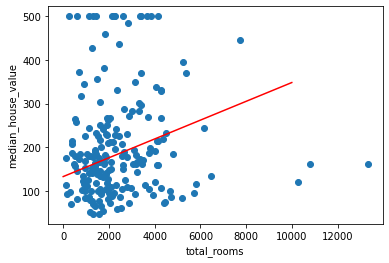

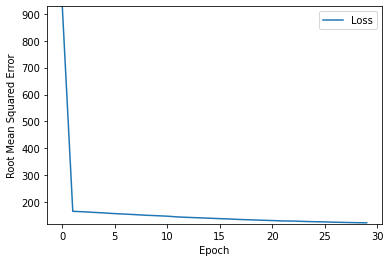

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Use the model to make predictions

You can use the trained model to make predictions. In practice, you should make predictions on examples that are not used in training. However, for this exercise, you'll just work with a subset of the same training dataset. 


In [ ]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             175
 3400     92             206
 3677     69             212
 2202     62             180
 2403     80             185
 5652    295             255
 3318    500             204
 2552    342             188
 1364    118             162
 3468    128             207


### Task 2: Judge the predictive power of the model

Look at the preceding table. How close is the predicted value to the label value?  In other words, does your model accurately predict house values?  

A. No, the predicted house prices are quite far off from what the actual values are. We need to select other features as well.

## Task 3: Try a different feature

The `total_rooms` feature had only a little predictive power. Would a different feature have greater predictive power?  Try using `population` as the feature instead of `total_rooms`. 

Note: When you change features, you might also need to change the hyperparameters.

Epoch 1/32


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



133/133 [==============================] - 1s 1ms/step - loss: 3052573.5000 - root_mean_squared_error: 1747.1615
Epoch 2/32
133/133 [==============================] - 0s 1ms/step - loss: 77099.9062 - root_mean_squared_error: 277.6687
Epoch 3/32
133/133 [==============================] - 0s 1ms/step - loss: 31438.9043 - root_mean_squared_error: 177.3102
Epoch 4/32
133/133 [==============================] - 0s 1ms/step - loss: 31177.3008 - root_mean_squared_error: 176.5710
Epoch 5/32
133/133 [==============================] - 0s 1ms/step - loss: 30720.8320 - root_mean_squared_error: 175.2736
Epoch 6/32
133/133 [==============================] - 0s 1ms/step - loss: 30951.8281 - root_mean_squared_error: 175.9313
Epoch 7/32
133/133 [==============================] - 0s 2ms/step - loss: 30568.7441 - root_mean_squared_error: 174.8392
Epoch 8/32
133/133 [==============================] - 0s 1ms/step - loss: 30268.5859 - root_mean_squared_error: 173.9787
Epoch 9/32
133/133 [====================

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



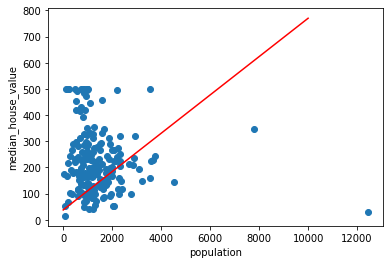

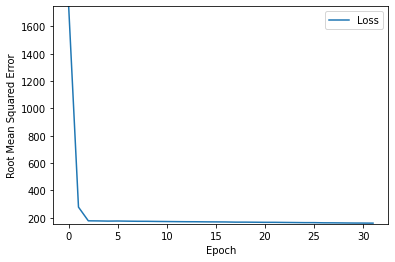

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 32
batch_size = 128

# Specify the feature and the label.
my_feature = "population"  
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on population

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             132
 1867     92             175
 2191     69             198
 1052     62             115
 1647     80             158
 2312    295             207
 1604    500             155
 1066    342             116
  338    118              63
 1604    128             155


This time the predicted values are closer to the actual values found in the dataset. By modifying the  feature and hyperparameter values, specifically raising the batch value, we managed to get values closer to the actual truth.

## Task 4: Define a synthetic feature

Perhaps though, the *ratio* of `total_rooms` to `population` might have some predictive power. That is, perhaps block density relates to median house value.

To explore this hypothesis, do the following: 

1. Create a synthetic feature that's a ratio of `total_rooms` to `population`.
2. Tune the three hyperparameters (experimentally). 
3. Determine whether this synthetic feature produces 
   a lower loss value than any of the single features you 
   tried earlier in this exercise.

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



133/133 [==============================] - 1s 3ms/step - loss: 55851.1328 - root_mean_squared_error: 236.3284
Epoch 2/40
133/133 [==============================] - 1s 4ms/step - loss: 54161.5586 - root_mean_squared_error: 232.7264
Epoch 3/40
133/133 [==============================] - 0s 2ms/step - loss: 52524.7852 - root_mean_squared_error: 229.1829
Epoch 4/40
133/133 [==============================] - 0s 2ms/step - loss: 50914.6484 - root_mean_squared_error: 225.6427
Epoch 5/40
133/133 [==============================] - 0s 1ms/step - loss: 49341.2109 - root_mean_squared_error: 222.1288
Epoch 6/40
133/133 [==============================] - 0s 1ms/step - loss: 47799.2578 - root_mean_squared_error: 218.6304
Epoch 7/40
133/133 [==============================] - 0s 1ms/step - loss: 46299.1758 - root_mean_squared_error: 215.1724
Epoch 8/40
133/133 [==============================] - 0s 1ms/step - loss: 44835.0195 - root_mean_squared_error: 211.7428
Epoch 9/40
133/133 [=======================

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



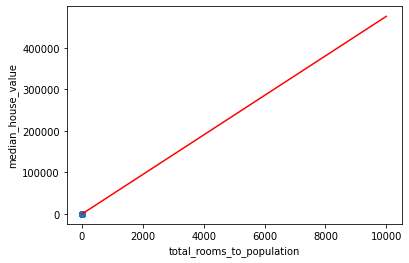

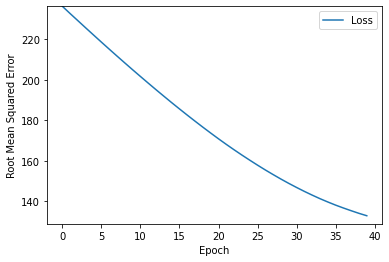

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 40
batch_size = 128

# Specify the feature and the label.
my_feature = "total_rooms_to_population"
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms_to_population. 

training_df[my_feature] = training_df.apply(lambda x: x.total_rooms / x.population, axis=1)

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             125
    2     92             140
    2     69             133
    2     62             152
    1     80             122
    2    295             169
    2    500             151
    2    342             167
    4    118             245
    2    128             156


By using the ratio and modifying the hyperparameters,by raising the epoch slightly, the predicted values have proven to be more consistent between eachother and some of them having predicted values closer to the actual values in the dataset than using the features separately.